In [143]:
# Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [144]:
# Read the datafiles
cityDataDf = pd.read_csv(os.path.join("raw_data","city_data.csv"))
rideDataDf = pd.read_csv(os.path.join("raw_data","ride_data.csv"))


In [145]:
# Create your summary dataframes/data

#Summarize the ride_data
# Get the total number of rides occurred in each of the cities and the total fare collected.
sumRideDataDf = rideDataDf.groupby(['city']).agg({'fare':['sum'],'city':['count']})
sumRideDataDf.reset_index(inplace = True)
sumRideDataDf.columns=[''.join(col) for col in sumRideDataDf.columns]
pd.DataFrame(sumRideDataDf.to_records())
sumRideDataDf = sumRideDataDf.rename(columns = {'faresum': 'Total Fare Amt','citycount': 'Num Rides' })


#Create a combined Df that combines the city data with summarized ride data
combineDataDf = pd.merge(cityDataDf,sumRideDataDf,how='outer',on='city')

combineDataDf['Average Fare'] = combineDataDf['Total Fare Amt']/combineDataDf['Num Rides']

combineDataDf.head()

,city,driver_count,type,Total Fare Amt,Num Rides,Average Fare
0,Kelseyland,63,Urban,610.58,28,21.806429
1,Nguyenbury,8,Urban,673.39,26,25.899615
2,East Douglas,12,Urban,575.72,22,26.169091
3,West Dawnfurt,34,Urban,647.58,29,22.330345
4,Rodriguezburgh,52,Urban,490.65,23,21.332609


In [146]:
# Before you start plotting..set your colors.
groups = ['Rural','Suburban','Urban' ]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.05) 

C:\Users\Ind\Anaconda3\envs\PythonData_3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


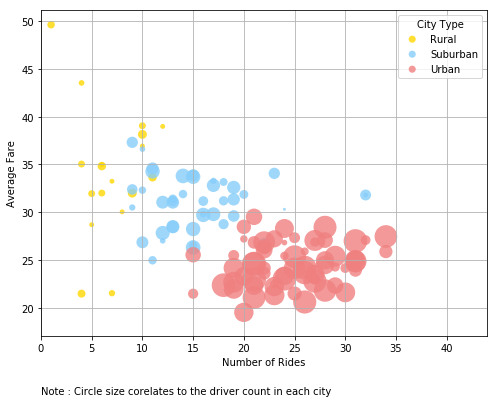

In [153]:


grpRural  = combineDataDf.loc[combineDataDf['type']=='Rural']
grpSubUrban  = combineDataDf.loc[combineDataDf['type']=='Suburban']
grpUrban  = combineDataDf.loc[combineDataDf['type']=='Urban']

dataGrps = (grpRural, grpSubUrban, grpUrban)

 
# Create plot
fig = plt.figure(figsize = (8,6))

ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
 
for data, color, group in zip(dataGrps, colors, groups):
    x = data['Num Rides']
    y = data['Average Fare']
    ax.scatter(x, y,s=data['driver_count']*8, alpha=0.8, c=color, edgecolors='none', label=group)
    
plt.grid(axis = 'both')
plt.xlim(0, x.max()+10)
plt.text(0, 11, "Note : Circle size corelates to the driver count in each city.", fontsize = 10)

lgnd = plt.legend(loc="best",title = 'City Type', scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

plt.xlabel("Number of Rides")
plt.ylabel("Average Fare")
plt.show()


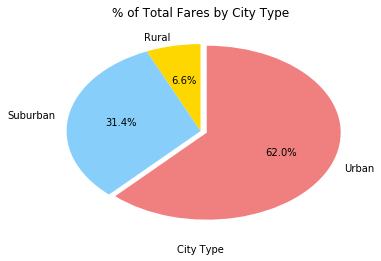

In [148]:
# Total Fares by city Type

fareByCityTypeDf = combineDataDf.groupby(['type'])['Total Fare Amt'].sum()


# Create a bar chart based off of the group series above
fareByCityPie = fareByCityTypeDf.plot(kind = 'pie',autopct='%1.1f%%',colors =colors,
                                      title = '% of Total Fares by City Type',
                                      explode =explode,startangle=90)

# Set the xlabel and ylabel using class methods
fareByCityPie.set_xlabel("City Type")
fareByCityPie.set_ylabel("")

plt.show()

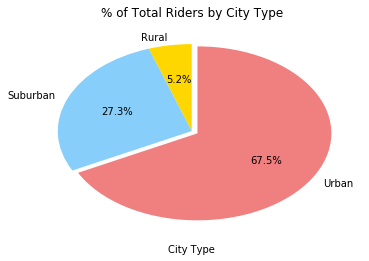

In [149]:
# Total Rides by city Type

ridesByCityTypeDf = combineDataDf.groupby(['type'])['Num Rides'].sum()


# Create a bar chart based off of the group series above
ridesByCityPie = ridesByCityTypeDf.plot(kind = 'pie',autopct='%1.1f%%',colors =colors,
                                      title = '% of Total Riders by City Type',
                                      explode =explode,startangle=90 )

# Set the xlabel and ylabel using class methods
ridesByCityPie.set_xlabel("City Type")
ridesByCityPie.set_ylabel("")

plt.show()

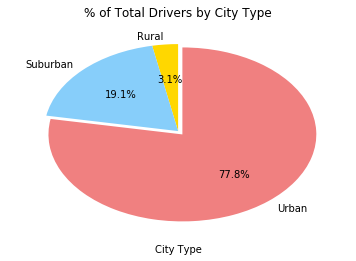

In [150]:
# Total Divers by city Type

driversByCityTypeDf = combineDataDf.groupby(['type'])['driver_count'].sum()


# Create a bar chart based off of the group series above
driversByCityPie = driversByCityTypeDf.plot(kind = 'pie',autopct='%1.1f%%',colors =colors,
                                      title = '% of Total Drivers by City Type',
                                       explode =explode,startangle=90)

# Set the xlabel and ylabel using class methods
driversByCityPie.set_xlabel("City Type")
driversByCityPie.set_ylabel("")


plt.show()